In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LassoCV
import matplotlib
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive



Mounted at /content/gdrive
 20190629_003153.jpg	        IMG-20190708-WA0021.jpg
 20220531_155346.mp4	        IMG-20190708-WA0022.jpg
'Advanced DB.gdoc'	        IMG-20190708-WA0023.jpg
'AMT Attachment details.gdoc'   IMG-20190708-WA0024.jpg
 batch1.zip		        IMG-20190708-WA0025.jpg
 batch2.zip		        IMG-20190708-WA0026.jpg
 batch3.zip		        IMG-20190708-WA0027.jpg
'Colab Notebooks'	        IMG-20190708-WA0028.jpg
 customTF2		        IMG-20190708-WA0029.jpg
 customTF2r		        InShot_20190709_061728021.jpg
'Group 4 - CAT 2.gslides'       Interviews.gdoc
 IMG_20170423_135113.jpg       'IS Concept Note.gdoc'
 IMG_20170521_154825.jpg        LabelData.zip
 IMG_20180105_133457_535.jpg   'Lubare Family Investment Contributions.gsheet'
 IMG_20180531_081449_929.jpg   'Machine Learning'
 IMG_20181224_064050.jpg       'My Drive'
 IMG-20190517-WA0051.jpg       'Our group project DBIT 2019.gdoc'
 IMG-20190517-WA0053.jpg       'Paraphrased copy.gdoc'
 IMG-20190517-WA0054.jpg       "Privacy 

In [3]:
data=pd.read_csv('/content/gdrive/MyDrive/Machine Learning/modified_data.csv')

In [4]:
data.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500


In [66]:
pd.DataFrame(data)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,1,3,Lvl,0,4,0,...,0,0,0,0,0,2,2008,8,4,208500
1,20,RL,80.0,9600,1,3,Lvl,0,2,0,...,0,0,0,0,0,5,2007,8,4,181500
2,60,RL,68.0,11250,1,0,Lvl,0,4,0,...,0,0,0,0,0,9,2008,8,4,223500
3,70,RL,60.0,9550,1,0,Lvl,0,0,0,...,272,0,0,0,0,2,2006,8,0,140000
4,60,RL,84.0,14260,1,0,Lvl,0,2,0,...,0,0,0,0,0,12,2008,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,1,3,Lvl,0,4,0,...,0,0,0,0,0,8,2007,8,4,175000
1456,20,RL,85.0,13175,1,3,Lvl,0,4,0,...,0,0,0,0,0,2,2010,8,4,210000
1457,70,RL,66.0,9042,1,3,Lvl,0,4,0,...,0,0,0,0,2500,5,2010,8,4,266500
1458,20,RL,68.0,9717,1,3,Lvl,0,4,0,...,112,0,0,0,0,4,2010,8,4,142125


In [5]:
data.shape

(1460, 77)

In [6]:
#it is a unique feature so it doesn't assist in the learning
data.drop('Id',inplace=True,axis=1)

In [7]:
data.head(1)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500


In [8]:
original_features=list(data.columns)
len(original_features)

76

In [9]:
#isna means is not available ...columns without values
features_missing_values=list(data.columns[data.isna().any()])
len(features_missing_values)

15

# Fill in Missing Features

In [10]:
#bfill, backward fill fills missing values meaning we use the value after the empty space to fill the space
#mean_fill uses the .mean method to fill values using the mean of the entire column
bfill,mean_fill=[],[]

In [11]:
#the loop adds columns with missing values into either the bfill or mean fill array based on datatype. Only the float64 are added to mean_fill 
#the rest are bfill
for feature in features_missing_values:
  print(feature,' ',data[feature].isna().sum()/len(data)*100,' ',data[feature].dtype)
  if data[feature].dtype=='float64':
    mean_fill.append(feature)
  else:
    bfill.append(feature)

LotFrontage   17.73972602739726   float64
MasVnrType   0.547945205479452   object
MasVnrArea   0.547945205479452   float64
BsmtQual   2.5342465753424657   object
BsmtCond   2.5342465753424657   object
BsmtExposure   2.6027397260273974   object
BsmtFinType1   2.5342465753424657   object
BsmtFinType2   2.6027397260273974   object
Electrical   0.0684931506849315   object
FireplaceQu   47.26027397260274   object
GarageType   5.5479452054794525   object
GarageYrBlt   5.5479452054794525   float64
GarageFinish   5.5479452054794525   object
GarageQual   5.5479452054794525   object
GarageCond   5.5479452054794525   object


In [12]:
mean_fill

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [13]:
#Uses mean method to determine the values to add
for feature in mean_fill:
  data[feature].fillna(data[feature].mean(),inplace=True)

In [14]:
#uses bfill method to determine value
for feature in bfill:
  data[feature].fillna(method='bfill',inplace=True)

In [15]:
#Confirming any empty values
data.columns[data.isna().any()]

Index(['FireplaceQu'], dtype='object')

In [16]:
data['FireplaceQu'].isna().sum()

2

In [17]:
#Using forward fill method where the value before the missing value is replicated into the empty space.
data['FireplaceQu'].fillna(method='ffill',inplace=True)


# Encode the Dataset

The features in the dataset are either categorical or numerical. The categorical ones are of datatype object. So they are filtered out then the numerical are found by subtracting the total features from the categorical.

In [18]:
categorical_features=list(data.select_dtypes(include=['object']).columns)
categorical_features

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [19]:
numerical=list(set(original_features)-set(categorical_features))
numerical

['FullBath',
 'GarageArea',
 'OverallCond',
 'YearRemodAdd',
 'KitchenAbvGr',
 'WoodDeckSF',
 'ScreenPorch',
 'SalePrice',
 'HalfBath',
 '1stFlrSF',
 'LowQualFinSF',
 'Fireplaces',
 'BsmtUnfSF',
 'BsmtFinSF2',
 'OpenPorchSF',
 '3SsnPorch',
 'YrSold',
 'MasVnrArea',
 'OverallQual',
 'YearBuilt',
 'BsmtFullBath',
 'MoSold',
 'TotRmsAbvGrd',
 'MiscVal',
 'GrLivArea',
 'BsmtFinSF1',
 'GarageCars',
 'BedroomAbvGr',
 'MSSubClass',
 '2ndFlrSF',
 'BsmtHalfBath',
 'GarageYrBlt',
 'PoolArea',
 'LotArea',
 'TotalBsmtSF',
 'LotFrontage',
 'EnclosedPorch']

In [20]:
categorical_features

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [21]:
data[categorical_features]

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,TA,Min1,TA,Attchd,Unf,TA,TA,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,Gd,Typ,Gd,Attchd,Unf,TA,TA,Y,WD,Normal


In [22]:
#Distinguish between nominal and ordinal in categorical
nominal=['MSZoning','LandContour','Neighborhood']
ordinal=list(set(categorical_features)-set(nominal))

In [23]:
data[nominal]

,MSZoning,LandContour,Neighborhood
0,RL,Lvl,CollgCr
1,RL,Lvl,Veenker
2,RL,Lvl,CollgCr
3,RL,Lvl,Crawfor
4,RL,Lvl,NoRidge
...,...,...,...
1455,RL,Lvl,Gilbert
1456,RL,Lvl,NWAmes
1457,RL,Lvl,Crawfor
1458,RL,Lvl,NAmes


In [24]:
target=['SalePrice']

In [25]:
data[ordinal]

,Electrical,KitchenQual,GarageCond,GarageFinish,Foundation,BsmtExposure,HeatingQC,BsmtQual,FireplaceQu,HouseStyle,...,Heating,SaleType,Utilities,ExterQual,SaleCondition,RoofStyle,LandSlope,BldgType,PavedDrive,BsmtFinType1
0,SBrkr,Gd,TA,RFn,PConc,No,Ex,Gd,TA,2Story,...,GasA,WD,AllPub,Gd,Normal,Gable,Gtl,1Fam,Y,GLQ
1,SBrkr,TA,TA,RFn,CBlock,Gd,Ex,Gd,TA,1Story,...,GasA,WD,AllPub,TA,Normal,Gable,Gtl,1Fam,Y,ALQ
2,SBrkr,Gd,TA,RFn,PConc,Mn,Ex,Gd,TA,2Story,...,GasA,WD,AllPub,Gd,Normal,Gable,Gtl,1Fam,Y,GLQ
3,SBrkr,Gd,TA,Unf,BrkTil,No,Gd,TA,Gd,2Story,...,GasA,WD,AllPub,TA,Abnorml,Gable,Gtl,1Fam,Y,ALQ
4,SBrkr,Gd,TA,RFn,PConc,Av,Ex,Gd,TA,2Story,...,GasA,WD,AllPub,Gd,Normal,Gable,Gtl,1Fam,Y,GLQ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,SBrkr,TA,TA,RFn,PConc,No,Ex,Gd,TA,2Story,...,GasA,WD,AllPub,TA,Normal,Gable,Gtl,1Fam,Y,Unf
1456,SBrkr,TA,TA,Unf,CBlock,No,TA,Gd,TA,1Story,...,GasA,WD,AllPub,TA,Normal,Gable,Gtl,1Fam,Y,ALQ
1457,SBrkr,Gd,TA,RFn,Stone,No,Ex,TA,Gd,2Story,...,GasA,WD,AllPub,Ex,Normal,Gable,Gtl,1Fam,Y,GLQ
1458,FuseA,Gd,TA,Unf,CBlock,Mn,Gd,TA,Gd,1Story,...,GasA,WD,AllPub,TA,Normal,Hip,Gtl,1Fam,Y,GLQ


In [26]:
#one-hot encoding the data..
df_nominal=pd.get_dummies(data[nominal])

In [27]:
data[df_nominal]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1456,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
for feature in ordinal:
  data[feature]=data[feature].astype('category').cat.codes

df_ordinal=data[ordinal]

In [67]:
df_ordinal

,Electrical,KitchenQual,GarageCond,GarageFinish,Foundation,BsmtExposure,HeatingQC,BsmtQual,FireplaceQu,HouseStyle,...,Heating,SaleType,Utilities,ExterQual,SaleCondition,RoofStyle,LandSlope,BldgType,PavedDrive,BsmtFinType1
0,4,2,4,1,2,3,0,2,4,5,...,1,8,0,2,4,1,0,0,2,2
1,4,3,4,1,1,1,0,2,4,2,...,1,8,0,3,4,1,0,0,2,0
2,4,2,4,1,2,2,0,2,4,5,...,1,8,0,2,4,1,0,0,2,2
3,4,2,4,2,0,3,2,3,2,5,...,1,8,0,3,0,1,0,0,2,0
4,4,2,4,1,2,0,0,2,4,5,...,1,8,0,2,4,1,0,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,4,3,4,1,2,3,0,2,4,5,...,1,8,0,3,4,1,0,0,2,5
1456,4,3,4,2,1,3,4,2,4,2,...,1,8,0,3,4,1,0,0,2,0
1457,4,2,4,1,4,3,0,3,2,5,...,1,8,0,0,4,1,0,0,2,2
1458,0,2,4,2,1,2,2,3,2,2,...,1,8,0,3,4,3,0,0,2,2


In [29]:
data[numerical]

,FullBath,GarageArea,OverallCond,YearRemodAdd,KitchenAbvGr,WoodDeckSF,ScreenPorch,SalePrice,HalfBath,1stFlrSF,...,BedroomAbvGr,MSSubClass,2ndFlrSF,BsmtHalfBath,GarageYrBlt,PoolArea,LotArea,TotalBsmtSF,LotFrontage,EnclosedPorch
0,2,548,5,2003,1,0,0,208500,1,856,...,3,60,854,0,2003.0,0,8450,856,65.0,0
1,2,460,8,1976,1,298,0,181500,0,1262,...,3,20,0,1,1976.0,0,9600,1262,80.0,0
2,2,608,5,2002,1,0,0,223500,1,920,...,3,60,866,0,2001.0,0,11250,920,68.0,0
3,1,642,5,1970,1,0,0,140000,0,961,...,3,70,756,0,1998.0,0,9550,756,60.0,272
4,2,836,5,2000,1,192,0,250000,1,1145,...,4,60,1053,0,2000.0,0,14260,1145,84.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,2,460,5,2000,1,0,0,175000,1,953,...,3,60,694,0,1999.0,0,7917,953,62.0,0
1456,2,500,6,1988,1,349,0,210000,0,2073,...,3,20,0,0,1978.0,0,13175,1542,85.0,0
1457,2,252,9,2006,1,0,0,266500,0,1188,...,4,70,1152,0,1941.0,0,9042,1152,66.0,0
1458,1,240,6,1996,1,366,0,142125,0,1078,...,2,20,0,0,1950.0,0,9717,1078,68.0,112


In [30]:
new_data=pd.concat([df_nominal,df_ordinal,data[numerical]],axis=1)

In [31]:
new_data.shape

(1460, 107)

In [32]:
new_data

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Neighborhood_Blmngtn,...,BedroomAbvGr,MSSubClass,2ndFlrSF,BsmtHalfBath,GarageYrBlt,PoolArea,LotArea,TotalBsmtSF,LotFrontage,EnclosedPorch
0,0,0,0,1,0,0,0,0,1,0,...,3,60,854,0,2003.0,0,8450,856,65.0,0
1,0,0,0,1,0,0,0,0,1,0,...,3,20,0,1,1976.0,0,9600,1262,80.0,0
2,0,0,0,1,0,0,0,0,1,0,...,3,60,866,0,2001.0,0,11250,920,68.0,0
3,0,0,0,1,0,0,0,0,1,0,...,3,70,756,0,1998.0,0,9550,756,60.0,272
4,0,0,0,1,0,0,0,0,1,0,...,4,60,1053,0,2000.0,0,14260,1145,84.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,0,1,0,0,0,0,1,0,...,3,60,694,0,1999.0,0,7917,953,62.0,0
1456,0,0,0,1,0,0,0,0,1,0,...,3,20,0,0,1978.0,0,13175,1542,85.0,0
1457,0,0,0,1,0,0,0,0,1,0,...,4,70,1152,0,1941.0,0,9042,1152,66.0,0
1458,0,0,0,1,0,0,0,0,1,0,...,2,20,0,0,1950.0,0,9717,1078,68.0,112


# Standardize
Standardization is a scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.

In [33]:
N=new_data.drop('SalePrice',axis=1,inplace=True)

In [34]:
new_data

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Neighborhood_Blmngtn,...,BedroomAbvGr,MSSubClass,2ndFlrSF,BsmtHalfBath,GarageYrBlt,PoolArea,LotArea,TotalBsmtSF,LotFrontage,EnclosedPorch
0,0,0,0,1,0,0,0,0,1,0,...,3,60,854,0,2003.0,0,8450,856,65.0,0
1,0,0,0,1,0,0,0,0,1,0,...,3,20,0,1,1976.0,0,9600,1262,80.0,0
2,0,0,0,1,0,0,0,0,1,0,...,3,60,866,0,2001.0,0,11250,920,68.0,0
3,0,0,0,1,0,0,0,0,1,0,...,3,70,756,0,1998.0,0,9550,756,60.0,272
4,0,0,0,1,0,0,0,0,1,0,...,4,60,1053,0,2000.0,0,14260,1145,84.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,0,1,0,0,0,0,1,0,...,3,60,694,0,1999.0,0,7917,953,62.0,0
1456,0,0,0,1,0,0,0,0,1,0,...,3,20,0,0,1978.0,0,13175,1542,85.0,0
1457,0,0,0,1,0,0,0,0,1,0,...,4,70,1152,0,1941.0,0,9042,1152,66.0,0
1458,0,0,0,1,0,0,0,0,1,0,...,2,20,0,0,1950.0,0,9717,1078,68.0,112


In [35]:
X=new_data.to_numpy()

In [36]:
X[0]

array([0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 4.000e+00, 2.000e+00,
       4.000e+00, 1.000e+00, 2.000e+00, 3.000e+00, 0.000e+00, 2.000e+00,
       4.000e+00, 5.000e+00, 3.000e+00, 4.000e+00, 2.000e+00, 2.000e+00,
       5.000e+00, 6.000e+00, 3.000e+00, 1.300e+01, 1.200e+01, 1.000e+00,
       4.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 4.000e+00, 1.000e+00,
       1.000e+00, 8.000e+00, 0.000e+00, 2.000e+00, 4.000e+00, 1.000e+00,
       0.000e+00, 0.000e+00, 2.000e+00, 2.000e+00, 2.000e+00, 5.480e+02,
       5.000e+00, 2.003e+03, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
       8.560e+02, 0.000e+00, 0.000e+00, 1.500e+02, 

In [37]:
X=StandardScaler().fit_transform(X)

In [38]:
X[0]

array([-0.08304548, -0.21585871, -0.10526316,  0.51813339, -0.41895507,
       -0.21235968, -0.18831089, -0.15899968,  0.33712564, -0.10854037,
       -0.03703704, -0.10526316, -0.20339487, -0.1398323 ,  2.95522137,
       -0.19025216, -0.27116307, -0.23917551, -0.16124951, -0.10854037,
       -0.1863522 , -0.42683279, -0.07875671, -0.22941573, -0.16998114,
       -0.23595776, -0.28963792, -0.13199092, -0.23106504, -0.20521398,
       -0.25018188, -0.13199092, -0.16347148, -0.08712888,  0.303692  ,
       -0.40936914,  0.18797343, -0.23012211,  0.83559903,  0.64046232,
       -0.88465767, -0.29055229,  1.11993319,  1.02668924,  0.28780036,
        0.36420746, -0.03628912, -0.03174026,  0.30941909,  0.25597761,
        0.75073056,  0.75162623,  0.74309239,  0.06423821,  0.22403433,
        0.26381257, -0.12579688, -0.71775144,  0.60466978, -1.23804229,
       -0.12304604,  0.31386709, -0.02618016, -0.77797579,  0.2085023 ,
       -0.49151573, -0.22571613, -0.41169079,  0.28974476, -0.40

In [39]:
y=data[target]

In [40]:
y=y.to_numpy()

In [41]:
y.shape

(1460, 1)

In [42]:
y

array([[208500],
       [181500],
       [223500],
       ...,
       [266500],
       [142125],
       [147500]])

In [43]:
y=StandardScaler().fit_transform(y)

In [44]:
y

array([[ 0.34727322],
       [ 0.00728832],
       [ 0.53615372],
       ...,
       [ 1.07761115],
       [-0.48852299],
       [-0.42084081]])

In [45]:
X.shape

(1460, 106)

# Feature Extraction Using PCA

In [46]:
#Reduces the number of features to the chosen integer that is 2
pca=PCA(n_components=2)

In [47]:
p_components=pca.fit_transform(X)

In [48]:
p_components

array([[ 2.44331033, -1.27697612],
       [ 0.31646089,  2.63666487],
       [ 2.85722152, -0.81020515],
       ...,
       [ 1.26182487, -0.86239282],
       [-2.85096759,  3.29584363],
       [-0.77738668,  2.79056132]])

In [49]:
pca.explained_variance_ratio_

array([0.10560233, 0.04472091])

In [ ]:
pca_data = pd.DataFrame(p_components,columns=['PC1','PC2'])
target_data = pd.DataFrame(y,columns=['SalePrice'])
final_data = pd.concat([pca_data,target_data],axis=1)
final_data

# Visualize the New Dataset

In [68]:
pca_data = pd.DataFrame(p_components,columns=['PC1','PC2'])
target_data = pd.DataFrame(y,columns=['SalePrice'])
final_data = pd.concat([pca_data,target_data],axis=1)
final_data

,PC1,PC2,SalePrice
0,2.443311,-1.278828,0.347273
1,0.316460,2.639005,0.007288
2,2.857221,-0.811098,0.536154
3,-1.333156,0.426608,-0.515281
4,5.220987,-0.250729,0.869843
...,...,...,...
1455,1.335074,-2.288237,-0.074560
1456,1.112796,3.257160,0.366161
1457,1.261822,-0.858240,1.077611
1458,-2.850969,3.295011,-0.488523


# Training a Single Model

In [51]:
regressor=LassoCV()

In [52]:
regressor.fit(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LassoCV()

In [53]:
regressor.coef_

array([-0.01958053,  0.00421262, -0.        ,  0.        , -0.0041397 ,
       -0.03514017,  0.0176365 , -0.        ,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.00136374,  0.0012973 ,  0.        ,
        0.0451363 , -0.02960456, -0.00458566, -0.        ,  0.        ,
       -0.00464433, -0.00184673,  0.        , -0.01474352,  0.10418035,
        0.10537053, -0.02123773, -0.        ,  0.        , -0.        ,
        0.03314127,  0.08018099,  0.        ,  0.01596762, -0.        ,
       -0.07826156,  0.00992633, -0.01785351,  0.        , -0.04228021,
       -0.00542086, -0.07979563, -0.00855582, -0.0010002 ,  0.01160099,
        0.00081534, -0.        , -0.01645398, -0.        ,  0.03858342,
       -0.        , -0.        , -0.01242678,  0.00733231,  0.        ,
        0.00280019,  0.04161263, -0.        , -0.        ,  0.01768867,
       -0.        , -0.01074259, -0.00691759, -0.05607135,  0.02770885,
        0.01921394,  0.00606007, -0.05021233,  0.00060882, -0.02

In [54]:
regressor.intercept_

2.5078911715757707e-16

# Feature Selection using L1

Selects features whose coefficient is not zero as seen in the graph. This helps reduce the dimension of the dataset by reducing features. (From what i have seen, there is no computation done, it just uses the results gotten from training in the previous section which is the regressor.coef_ and the sorts and picks values that are less than or greater than but not equal to zero.)

L1 selected only  72  features out of  106  from the transformed dataset 


Text(0.5, 1.0, 'Feature Selection Using L1 Embedder')

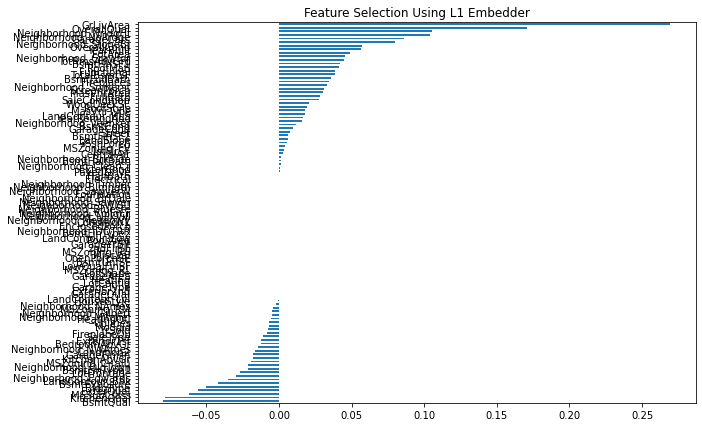

In [55]:
#print(regressor.coef_)
coef_col = pd.Series(regressor.coef_,index=new_data.columns)

#print(coef_col)
sorted_coef = coef_col.sort_values()
matplotlib.rcParams['figure.figsize']=(10.0,7.0)
sorted_coef.plot(kind="barh")

no_of_selected_features = sum(coef_col != 0)
no_of_rejected_features = sum(coef_col == 0)
total_features = no_of_selected_features + no_of_rejected_features
print("L1 selected only ",no_of_selected_features," features out of ",total_features," from the transformed dataset ")
plt.title("Feature Selection Using L1 Embedder")


In [56]:
sorted_coef

BsmtQual               -0.079796
KitchenQual            -0.078262
MSSubClass             -0.062002
ExterQual              -0.056071
BldgType               -0.050212
                          ...   
GarageCars              0.086070
Neighborhood_NoRidge    0.104180
Neighborhood_NridgHt    0.105371
OverallQual             0.170837
GrLivArea               0.269468
Length: 106, dtype: float64

# Train a regression model using PCA with 2 components
Here we should reduce the number of features from the 72 chosen above to 2 then we train using those. 







In [57]:
pca=PCA(n_components=2)

In [58]:
X

array([[-0.08304548, -0.21585871, -0.10526316, ..., -0.45930254,
        -0.22937175, -0.3593249 ],
       [-0.08304548, -0.21585871, -0.10526316, ...,  0.46646492,
         0.4519361 , -0.3593249 ],
       [-0.08304548, -0.21585871, -0.10526316, ..., -0.31336875,
        -0.09311018, -0.3593249 ],
       ...,
       [-0.08304548, -0.21585871, -0.10526316, ...,  0.21564122,
        -0.18395123, -0.3593249 ],
       [-0.08304548, -0.21585871, -0.10526316, ...,  0.04690528,
        -0.09311018,  1.47378925],
       [-0.08304548, -0.21585871, -0.10526316, ...,  0.45278362,
         0.22483348, -0.3593249 ]])

In [59]:
p_components=pca.fit_transform(X)

In [60]:
p_components

array([[ 2.44331084, -1.27882751],
       [ 0.31646015,  2.63900528],
       [ 2.85722121, -0.81109829],
       ...,
       [ 1.26182201, -0.8582403 ],
       [-2.85096901,  3.29501118],
       [-0.77738682,  2.79033643]])

In [61]:
pca.explained_variance_ratio_

array([0.10560233, 0.04472091])

In [62]:
regressor=LassoCV()

In [63]:
regressor.fit(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LassoCV()

In [64]:
regressor.coef_

array([-0.01958053,  0.00421262, -0.        ,  0.        , -0.0041397 ,
       -0.03514017,  0.0176365 , -0.        ,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.00136374,  0.0012973 ,  0.        ,
        0.0451363 , -0.02960456, -0.00458566, -0.        ,  0.        ,
       -0.00464433, -0.00184673,  0.        , -0.01474352,  0.10418035,
        0.10537053, -0.02123773, -0.        ,  0.        , -0.        ,
        0.03314127,  0.08018099,  0.        ,  0.01596762, -0.        ,
       -0.07826156,  0.00992633, -0.01785351,  0.        , -0.04228021,
       -0.00542086, -0.07979563, -0.00855582, -0.0010002 ,  0.01160099,
        0.00081534, -0.        , -0.01645398, -0.        ,  0.03858342,
       -0.        , -0.        , -0.01242678,  0.00733231,  0.        ,
        0.00280019,  0.04161263, -0.        , -0.        ,  0.01768867,
       -0.        , -0.01074259, -0.00691759, -0.05607135,  0.02770885,
        0.01921394,  0.00606007, -0.05021233,  0.00060882, -0.02

In [65]:
regressor.intercept_

2.5078911715757707e-16

#Training using the p-components

In [69]:
X=p_components

In [70]:
X

array([[ 2.44331084, -1.27882751],
       [ 0.31646015,  2.63900528],
       [ 2.85722121, -0.81109829],
       ...,
       [ 1.26182201, -0.8582403 ],
       [-2.85096901,  3.29501118],
       [-0.77738682,  2.79033643]])

In [71]:
y

array([[ 0.34727322],
       [ 0.00728832],
       [ 0.53615372],
       ...,
       [ 1.07761115],
       [-0.48852299],
       [-0.42084081]])

In [72]:
regressor=LassoCV()

In [73]:
regressor.fit(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LassoCV()

In [74]:
regressor.coef_

array([0.25387737, 0.01888395])

In [75]:
regressor.intercept_

1.127470131684195e-16